In [1]:
import numpy as np
import pandas as pd

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler, SMOTE

from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/kaggle/input/uci-semcom/uci-secom.csv')
data

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2008-10-16 15:13:00,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,...,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
1563,2008-10-16 20:49:00,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,...,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
1564,2008-10-17 05:26:00,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,...,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1
1565,2008-10-17 06:01:00,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,...,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1


In [54]:
def preprocess_inputs(df):
    df = df.copy()
    
    ## Drop the Time column
    df = df.drop('Time', axis = 1)
    
    ## Drop columns with more than 25% missing values
    bad_columns = df.columns[df.isna().mean() > 0.25]
    df = df.drop(bad_columns, axis = 1)
    
    ## Filling the remaining missing values with mean
    for column in df.columns:
        df[column] = df[column].fillna(df[column].mean())
        
    ## Remove columns with only one value
    single_value_columns = pd.Series({column: len(df[column].unique()) for column in df.columns})[(pd.Series({column: len(df[column].unique()) for column in df.columns}) ==1)].index
    df = df.drop(single_value_columns, axis = 1)
    
    ## Give Text labels to the training example
    df['Pass/Fail'] = df['Pass/Fail'].replace({-1: "PASS", 1: "FAIL"})
    
    ## Split the df into X and y
    y = df['Pass/Fail']
    X = df.drop('Pass/Fail', axis = 1)
    
    ## train - Test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 1, shuffle = True)
    
    ## Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index = X_train.index, columns = X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index = X_test.index, columns = X_test.columns)
    
    return X_train, X_test, y_train, y_test, X, y

In [55]:
X_train, X_test, y_train, y_test, X, y = preprocess_inputs(data)
X_train

,0,1,2,3,4,6,7,8,9,10,...,576,577,582,583,584,585,586,587,588,589
390,-0.349832,-0.784979,-0.702110,-0.837070,-0.062886,0.550891,0.079727,1.660382,0.575205,-2.431983,...,-0.229337,-0.101179,-1.421245,-0.104493,0.090875,-0.091661,-0.896661,-0.895327,-0.972313,-0.222332
635,0.033698,0.353357,0.015921,-1.183386,-0.051551,0.845131,-0.117085,-1.250633,0.022325,0.591865,...,-0.236675,0.059216,-0.063064,-0.367069,-0.378555,-0.351676,0.896361,0.747328,0.485680,-0.307801
78,0.246294,0.059202,-0.586681,0.429161,-0.052493,-0.356155,0.263419,-0.036013,-0.166304,-0.468738,...,-0.208856,0.044560,-1.155514,-0.185286,-0.065602,-0.176462,-0.488429,0.120526,0.054910,0.135286
733,0.315914,-1.701055,0.354622,0.405983,-0.058342,0.791001,0.027244,0.827113,3.098939,-0.107682,...,-0.214130,-0.328386,-1.037412,0.232143,0.122170,0.233756,0.952392,-0.884520,-0.773496,-0.787101
1262,-0.448795,0.573974,-0.926520,-0.573652,-0.059723,0.447072,0.355265,-1.193634,-1.285073,-1.168285,...,-0.195474,-0.249656,-1.509822,-0.037166,-0.159488,-0.028790,-0.632511,1.730761,1.811128,1.406800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,0.760898,-0.466310,0.543717,-1.204002,-0.054619,0.995094,-0.340139,-0.701000,-1.239541,0.275941,...,-0.219221,-0.656602,-1.096463,0.009963,-0.034307,0.017244,-1.152807,0.477155,0.386272,1.968328
905,-0.920769,0.379892,0.543337,-0.652297,-0.061495,-0.202822,-0.195810,0.057628,0.139406,0.501601,...,-0.213599,-0.647856,1.413220,-0.225682,-0.284669,-0.223534,-0.040173,-0.549505,-0.574678,-0.484059
1096,0.659998,-0.060836,2.263423,1.479871,-0.047401,-1.023442,-0.051481,-0.994138,0.399585,-0.615418,...,-0.216786,-0.198393,0.616026,-0.272811,-0.128193,-0.268303,-0.296319,-0.938555,-0.972313,-0.591078
235,0.423734,-0.074230,-0.101032,-0.341214,-0.062369,-0.213299,-0.222052,-0.521861,-2.176185,-0.175380,...,-0.267046,-0.597438,-1.568874,-0.205484,-0.003011,-0.191936,-2.001291,-0.787258,-0.773496,1.767280


In [56]:
single_value_columns = pd.Series({column: len(X[column].unique()) for column in X.columns})[(pd.Series({column: len(X[column].unique()) for column in X.columns}) ==1)].index

In [57]:
single_value_columns

Index([], dtype='object')

In [58]:
X_train.describe()

,0,1,2,3,4,6,7,8,9,10,...,576,577,582,583,584,585,586,587,588,589
count,1.096000e+03,1.096000e+03,1.096000e+03,1.096000e+03,1.096000e+03,1.096000e+03,1.096000e+03,1.096000e+03,1.096000e+03,1.096000e+03,...,1.096000e+03,1.096000e+03,1.096000e+03,1.096000e+03,1.096000e+03,1.096000e+03,1.096000e+03,1.096000e+03,1.096000e+03,1.096000e+03
mean,-3.265839e-15,-1.756908e-15,7.436063e-15,-9.724581e-17,-1.458687e-17,-1.653179e-15,1.408444e-15,1.789323e-15,-3.241527e-18,1.620764e-18,...,-1.337130e-17,1.000821e-16,3.864387e-14,4.862291e-18,2.755298e-17,5.834749e-17,1.491102e-16,8.184856e-17,1.636971e-16,1.284455e-16
std,1.000457e+00,1.000457e+00,1.000457e+00,1.000457e+00,1.000457e+00,1.000457e+00,1.000457e+00,1.000457e+00,1.000457e+00,1.000457e+00,...,1.000457e+00,1.000457e+00,1.000457e+00,1.000457e+00,1.000457e+00,1.000457e+00,1.000457e+00,1.000457e+00,1.000457e+00,1.000457e+00
min,-3.150257e+00,-4.262910e+00,-4.782325e+00,-1.571881e+00,-6.417723e-02,-3.054755e+00,-1.600641e+01,-3.707014e+00,-3.418538e+00,-3.706964e+00,...,-2.843900e-01,-9.386050e-01,-5.909148e+00,-6.161799e-01,-6.602134e-01,-5.956335e-01,-2.209409e+00,-1.446482e+00,-1.436220e+00,-1.046978e+00
25%,-6.856466e-01,-5.608241e-01,-6.636664e-01,-7.204139e-01,-5.827950e-02,-4.995533e-01,-1.170853e-01,-7.091432e-01,-6.541393e-01,-6.154176e-01,...,-2.395413e-01,-4.087495e-01,-6.535778e-01,-2.391477e-01,-2.220788e-01,-2.353507e-01,-6.645289e-01,-6.683815e-01,-6.740870e-01,-5.915472e-01
50%,-2.221880e-02,3.279347e-02,7.806762e-04,-2.304217e-01,-5.308514e-02,3.763994e-02,4.036462e-02,-1.701377e-02,-3.946705e-02,4.463879e-02,...,-2.252072e-01,-2.173440e-01,-4.012951e-03,-9.102792e-02,-6.560214e-02,-8.990918e-02,-8.820051e-02,-1.928759e-01,-2.433163e-01,-3.052727e-01
75%,6.021778e-01,5.367619e-01,5.964948e-01,4.428091e-01,-4.942624e-02,5.399739e-01,2.371771e-01,7.283825e-01,6.142320e-01,6.482801e-01,...,-2.086557e-01,5.719137e-02,6.455519e-01,9.075545e-02,9.087452e-02,8.608378e-02,5.041370e-01,4.474357e-01,3.614195e-01,1.698775e-01
max,3.706237e+00,3.967500e+00,3.540769e+00,5.106488e+00,1.911461e+01,4.471525e+00,7.357685e-01,2.609007e+00,4.926694e+00,4.134732e+00,...,5.058134e+00,6.591098e+00,2.889503e+00,3.106799e+01,3.151139e+01,3.123093e+01,6.499554e+00,6.842446e+00,7.709373e+00,6.571834e+00


In [59]:
## Examining class imbalance
y_train.value_counts()

PASS    1024
FAIL      72
Name: Pass/Fail, dtype: int64

<AxesSubplot:>

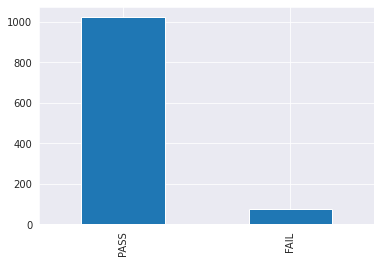

In [65]:
y_train.value_counts().plot(kind = 'bar')

In [74]:
fig = px.bar(
    y_train.value_counts(),
    title = 'Class Distribution',
    width = 500
)
fig.show()

In [76]:
fig = px.pie(
    y_train.value_counts(),
    values = 'Pass/Fail',
    names = ['PASS', 'Fail'],
    title = 'Class Distribution',
    width = 500
)
fig.show()

In [77]:
def evaluate_model(model, X_test, y_test):
    
    acc = model.score(X_test, y_test)
    print("Accuracy: {:.2f}%".format(acc * 100))
    
    y_pred = model.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred, labels=['PASS', 'FAIL'])
    clr = classification_report(y_test, y_pred, labels=['PASS', 'FAIL'])
    
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
    plt.xticks(ticks=[0.5, 1.5], labels=["PASS", "FAIL"])
    plt.yticks(ticks=[0.5, 1.5], labels=["PASS", "FAIL"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
    
    print("Classification Report:\n----------------------\n", clr)

Accuracy: 88.96%


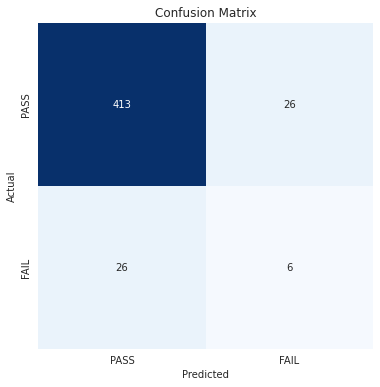

Classification Report:
----------------------
               precision    recall  f1-score   support

        PASS       0.94      0.94      0.94       439
        FAIL       0.19      0.19      0.19        32

    accuracy                           0.89       471
   macro avg       0.56      0.56      0.56       471
weighted avg       0.89      0.89      0.89       471



In [78]:
model = LogisticRegression()
model.fit(X_train, y_train)

evaluate_model(model, X_test, y_test)

In [79]:
## Random Oversampling

In [81]:
oversampler = RandomOverSampler(random_state = 1)
X_train_os, y_train_os = oversampler.fit_resample(X_train, y_train)

In [82]:
fig = px.bar(
    y_train_os.value_counts(),
    title = 'Class Distribution',
    width = 500
)
fig.show()

Accuracy: 86.62%


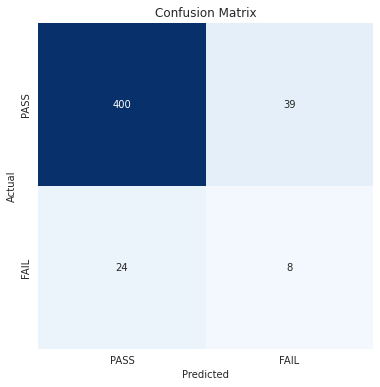

Classification Report:
----------------------
               precision    recall  f1-score   support

        PASS       0.94      0.91      0.93       439
        FAIL       0.17      0.25      0.20        32

    accuracy                           0.87       471
   macro avg       0.56      0.58      0.56       471
weighted avg       0.89      0.87      0.88       471



In [83]:
model = LogisticRegression()
model.fit(X_train_os, y_train_os)

evaluate_model(model, X_test, y_test)

In [84]:
## Oversampling with SMOTE

In [86]:
oversampler = SMOTE(random_state = 1)
X_train_smote, y_train_smote = oversampler.fit_resample(X_train, y_train)

In [87]:
fig = px.bar(
    y_train_smote.value_counts(),
    title = 'Class Distribution',
    width = 500
)
fig.show()

Accuracy: 85.77%


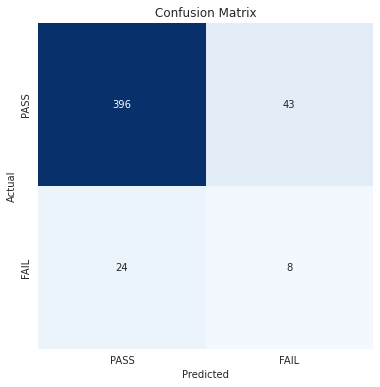

Classification Report:
----------------------
               precision    recall  f1-score   support

        PASS       0.94      0.90      0.92       439
        FAIL       0.16      0.25      0.19        32

    accuracy                           0.86       471
   macro avg       0.55      0.58      0.56       471
weighted avg       0.89      0.86      0.87       471



In [88]:
model = LogisticRegression()
model.fit(X_train_smote, y_train_smote)

evaluate_model(model, X_test, y_test)